In [33]:
import IPython.display as ipd
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
non_shoplifters_path = "Shop_DataSet/non_shop_lifters"
shoplifters_path = "Shop_DataSet/shop_lifters"

# Data Understanding 

In [91]:
shop_width , nonshop_width = [] , []
shop_height , nonshop_height = [] , []
Dur_shoplifter, Dur_nonshoplifter = [], []
shoplifter_frames, nonshoplifter_frames = [], []

for vid_name in os.listdir(shoplifters_path):
    vid_path = os.path.join(shoplifters_path, vid_name)
    cap = cv2.VideoCapture(vid_path)

    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    shop_height.append(height)
    shop_width.append(width)
    
    fps = cap.get(cv2.CAP_PROP_FPS)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    Dur_shoplifter.append(frames/fps)

    shoplifter_frames.append(frames)
    
    cap.release()

for vid_name in os.listdir(non_shoplifters_path):
    vid_path = os.path.join(non_shoplifters_path, vid_name)
    cap = cv2.VideoCapture(vid_path)
            
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    nonshop_height.append(height)
    nonshop_width.append(width)

    fps = cap.get(cv2.CAP_PROP_FPS)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    Dur_nonshoplifter.append(frames/fps)

    nonshoplifter_frames.append(frames)
    
    cap.release()


In [93]:
print(f"Shoplifters videos shape, width = {np.unique(np.array(shop_width))} and height = {np.unique(np.array(shop_height))}")
print(f"Non_shoplifter videos shape, width = {np.unique(np.array(nonshop_width))} and height = {np.unique(np.array(nonshop_height))}")

Shoplifters videos shape, width = [704.] and height = [576.]
Non_shoplifter videos shape, width = [704.] and height = [576.]


In [95]:
def plot_bar(x, y, x_title, y_title, title):
    plt.style.use("dark_background")
    plt.bar([x_title, y_title],[x, y],
            color=["skyblue","Green"],edgecolor="black",linewidth=8)
    plt.title(title)
    plt.show()

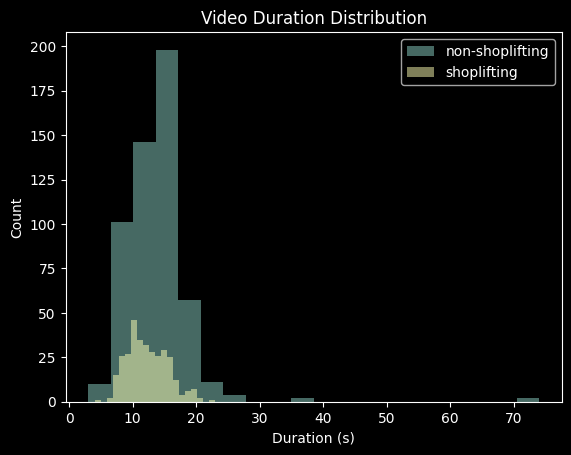

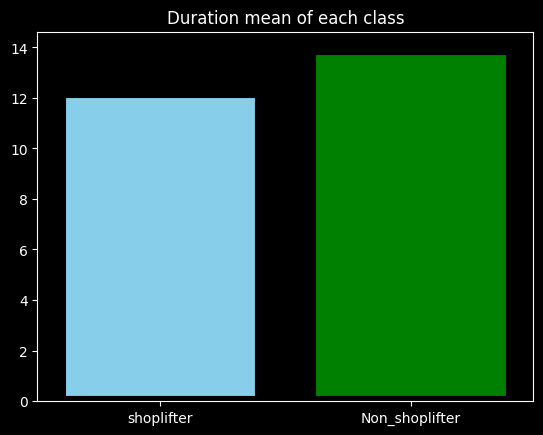

In [97]:
plt.hist(Dur_nonshoplifter, bins=20, alpha=0.5, label="non-shoplifting")
plt.hist(Dur_shoplifter, bins=20, alpha=0.5, label="shoplifting")
plt.legend()
plt.xlabel("Duration (s)")
plt.ylabel("Count")
plt.title("Video Duration Distribution")
plt.show()

Dur_shoplifter_mean, Dur_nonshoplifter_mean = np.mean(np.array(Dur_shoplifter)), np.mean(np.array(Dur_nonshoplifter))
plot_bar(Dur_shoplifter_mean, Dur_nonshoplifter_mean, "shoplifter", "Non_shoplifter", "Duration mean of each class")

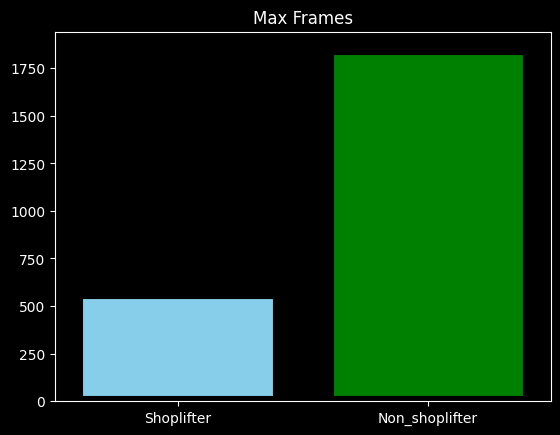

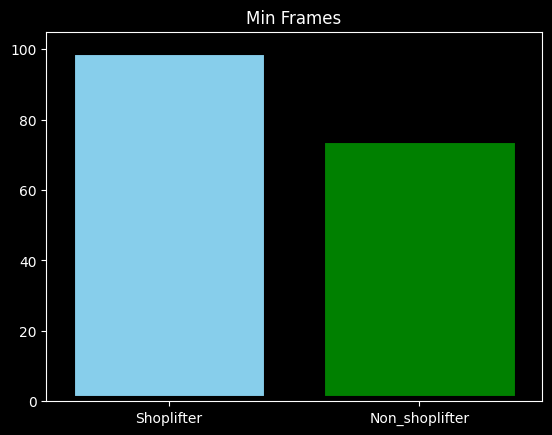

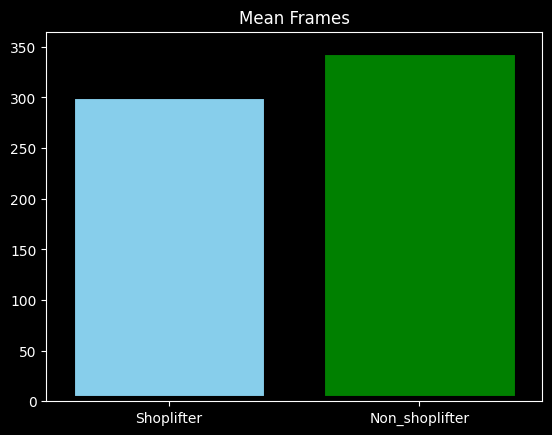

In [99]:
max_shoplifter_frames, min_shoplifter_frames, mean_shoplifter_frames = np.max(shoplifter_frames), np.min(shoplifter_frames), np.mean(shoplifter_frames)
max_nonshoplifter_frames, min_nonshoplifter_frames, mean_nonshoplifter_frames = np.max(nonshoplifter_frames), np.min(nonshoplifter_frames), np.mean(nonshoplifter_frames)
plot_bar(max_shoplifter_frames, max_nonshoplifter_frames, "Shoplifter", "Non_shoplifter", "Max Frames")
plot_bar(min_shoplifter_frames, min_nonshoplifter_frames, "Shoplifter", "Non_shoplifter", "Min Frames")
plot_bar(mean_shoplifter_frames, mean_nonshoplifter_frames, "Shoplifter", "Non_shoplifter", "Mean Frames")

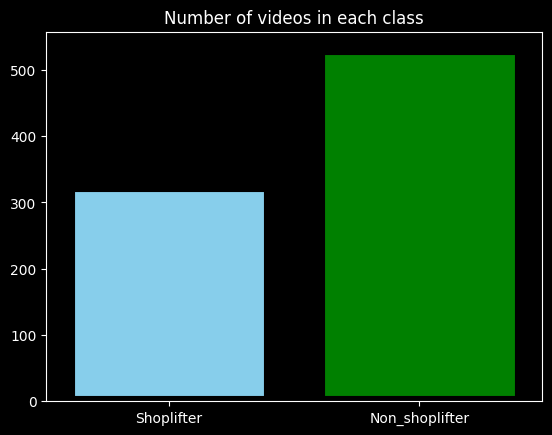

In [101]:
no_of_shoplifters = np.count_nonzero(np.array(shop_width))
no_of_nonshoplifters = np.count_nonzero(np.array(nonshop_width))
plot_bar(no_of_shoplifters, no_of_nonshoplifters, "Shoplifter", "Non_shoplifter", "Number of videos in each class")

In [107]:
# print(np.count_nonzero(np.array(shop_width)))
# print(np.count_nonzero(np.array(nonshop_width)))

324
531


In [109]:
print(np.sum(shoplifter_frames))
print(np.sum(nonshoplifter_frames))

98691
184673


# Frames Extracting

In [79]:
def extract(vid_path, save_videos_dir, idx):
    os.makedirs(save_videos_dir, exist_ok=True)
    cap = cv2.VideoCapture(vid_path)
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    FPS = 25
    out_video = cv2.VideoWriter(f"{save_videos_dir}/video_{idx}.mp4", cv2.VideoWriter_fourcc(*'mp4v'), 
                                FPS , isColor=True, frameSize=(width, height))
    step = int(frames / 70)
 
    frame_idx, frame_written = 0, 0
    while cap.isOpened() and frame_written < 70 :
        cap.set(cv2.CAP_PROP_POS_FRAMES, int(frame_idx))
        ret, frame = cap.read()
        if not ret:
            break
        out_video.write(frame)
        frame_written += 1
        frame_idx += step
    cap.release()
    out_video.release()

In [85]:
idx = 0
for vid_name in os.listdir(shoplifters_path):
    vid_path = os.path.join(shoplifters_path, vid_name)
    extract(vid_path, "Edited_Shop_Dataset/shop_lifters", idx)
    idx+=1

In [83]:
idx = 0
for vid_name in os.listdir(non_shoplifters_path):
    vid_path = os.path.join(non_shoplifters_path, vid_name)
    extract(vid_path, "Edited_Shop_Dataset/non_shop_lifters", idx)
    idx+=1

In [119]:
for vid_name in os.listdir("Edited_Shop_Dataset/shop_lifters"):
    vid_path = os.path.join("Edited_Shop_Dataset/shop_lifters", vid_name)
    cap = cv2.VideoCapture(vid_path)

    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"{vid_name} :  ",[width, height, fps, frames])
    
    cap.release()

video_0.mp4 :   [704.0, 576.0, 25.0, 70]
video_1.mp4 :   [704.0, 576.0, 25.0, 70]
video_10.mp4 :   [704.0, 576.0, 25.0, 70]
video_100.mp4 :   [704.0, 576.0, 25.0, 70]
video_101.mp4 :   [704.0, 576.0, 25.0, 70]
video_102.mp4 :   [704.0, 576.0, 25.0, 70]
video_103.mp4 :   [704.0, 576.0, 25.0, 70]
video_104.mp4 :   [704.0, 576.0, 25.0, 70]
video_105.mp4 :   [704.0, 576.0, 25.0, 70]
video_106.mp4 :   [704.0, 576.0, 25.0, 70]
video_107.mp4 :   [704.0, 576.0, 25.0, 70]
video_108.mp4 :   [704.0, 576.0, 25.0, 70]
video_109.mp4 :   [704.0, 576.0, 25.0, 70]
video_11.mp4 :   [704.0, 576.0, 25.0, 70]
video_110.mp4 :   [704.0, 576.0, 25.0, 70]
video_111.mp4 :   [704.0, 576.0, 25.0, 70]
video_112.mp4 :   [704.0, 576.0, 25.0, 70]
video_113.mp4 :   [704.0, 576.0, 25.0, 70]
video_114.mp4 :   [704.0, 576.0, 25.0, 70]
video_115.mp4 :   [704.0, 576.0, 25.0, 70]
video_116.mp4 :   [704.0, 576.0, 25.0, 70]
video_117.mp4 :   [704.0, 576.0, 25.0, 70]
video_118.mp4 :   [704.0, 576.0, 25.0, 70]
video_119.mp4 :  

In [121]:
for vid_name in os.listdir("Edited_Shop_Dataset/non_shop_lifters"):
    vid_path = os.path.join("Edited_Shop_Dataset/non_shop_lifters", vid_name)
    cap = cv2.VideoCapture(vid_path)

    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"{vid_name} :  ",[width, height, fps, frames])
    
    cap.release()

video_0.mp4 :   [704.0, 576.0, 25.0, 70]
video_1.mp4 :   [704.0, 576.0, 25.0, 70]
video_10.mp4 :   [704.0, 576.0, 25.0, 70]
video_100.mp4 :   [704.0, 576.0, 25.0, 70]
video_101.mp4 :   [704.0, 576.0, 25.0, 70]
video_102.mp4 :   [704.0, 576.0, 25.0, 70]
video_103.mp4 :   [704.0, 576.0, 25.0, 70]
video_104.mp4 :   [704.0, 576.0, 25.0, 70]
video_105.mp4 :   [704.0, 576.0, 25.0, 70]
video_106.mp4 :   [704.0, 576.0, 25.0, 70]
video_107.mp4 :   [704.0, 576.0, 25.0, 70]
video_108.mp4 :   [704.0, 576.0, 25.0, 70]
video_109.mp4 :   [704.0, 576.0, 25.0, 70]
video_11.mp4 :   [704.0, 576.0, 25.0, 70]
video_110.mp4 :   [704.0, 576.0, 25.0, 70]
video_111.mp4 :   [704.0, 576.0, 25.0, 70]
video_112.mp4 :   [704.0, 576.0, 25.0, 70]
video_113.mp4 :   [704.0, 576.0, 25.0, 70]
video_114.mp4 :   [704.0, 576.0, 25.0, 70]
video_115.mp4 :   [704.0, 576.0, 25.0, 70]
video_116.mp4 :   [704.0, 576.0, 25.0, 70]
video_117.mp4 :   [704.0, 576.0, 25.0, 70]
video_118.mp4 :   [704.0, 576.0, 25.0, 70]
video_119.mp4 :  